# What are the most important internal and external features in predicting rental prices? 

In [500]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from statsmodels.formula.api import ols, glm, wls
from statsmodels.api import families
from numpy import log


df = pd.read_csv('../data/curated/engineered-data.csv')
crime_rate = pd.read_csv('../data/curated/Crime_Rate.csv')

df = df.merge(crime_rate, left_on='postcode', right_on='Postcode')

In [501]:
df

,suburb,postcode,price,propertyType,bedrooms,bathrooms,parkingSpaces,studies,furnished,closest_primary_distance,...,min_pri_icsea,min_sec_icsea,park_walkability,is_primary_school_walkable,is_secondary_school_walkable,is_tram_stop_walkable,is_train_station_walkable,Postcode,Crime Rate,zlogCrimerate
0,Melbourne,3000,560,Apartment,2,1,0,0,N,821.8,...,1140.0,1127.0,$<$1.5 km,Yes,No,Yes,Yes,3000,16212,2.282536
1,Melbourne,3000,580,Apartment,2,1,0,0,Y,1690.6,...,1114.0,1138.0,1.5-5km,No,No,Yes,Yes,3000,16212,2.282536
2,Melbourne,3000,450,Apartment,1,1,0,0,N,786.9,...,1140.0,1127.0,$<$1.5 km,Yes,No,Yes,Yes,3000,16212,2.282536
3,Melbourne,3000,550,Apartment,2,2,1,0,N,2026.9,...,1114.0,1138.0,1.5-5km,No,No,Yes,No,3000,16212,2.282536
4,Melbourne,3000,600,Apartment,2,1,0,0,Y,1690.6,...,1114.0,1138.0,1.5-5km,No,No,Yes,Yes,3000,16212,2.282536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10417,Mount Dandenong,3767,750,House,3,2,6,0,N,2244.4,...,1011.0,NaN,1.5-5km,No,No,No,No,3767,108,-0.187339
10418,Cockatoo,3781,300,House,1,1,1,0,N,1761.4,...,1009.0,NaN,1.5-5km,No,No,No,No,3781,196,0.106394
10419,Emerald,3782,680,House,3,2,2,1,N,3251.3,...,982.0,973.0,1.5-5km,No,No,No,No,3782,260,0.245658
10420,Emerald,3782,490,House,3,1,1,0,N,2350.8,...,1048.0,973.0,1.5-5km,No,No,No,No,3782,260,0.245658


In [502]:
df.head(20)

,suburb,postcode,price,propertyType,bedrooms,bathrooms,parkingSpaces,studies,furnished,closest_primary_distance,...,min_pri_icsea,min_sec_icsea,park_walkability,is_primary_school_walkable,is_secondary_school_walkable,is_tram_stop_walkable,is_train_station_walkable,Postcode,Crime Rate,zlogCrimerate
0,Melbourne,3000,560,Apartment,2,1,0,0,N,821.8,...,1140.0,1127.0,$<$1.5 km,Yes,No,Yes,Yes,3000,16212,2.282536
1,Melbourne,3000,580,Apartment,2,1,0,0,Y,1690.6,...,1114.0,1138.0,1.5-5km,No,No,Yes,Yes,3000,16212,2.282536
2,Melbourne,3000,450,Apartment,1,1,0,0,N,786.9,...,1140.0,1127.0,$<$1.5 km,Yes,No,Yes,Yes,3000,16212,2.282536
3,Melbourne,3000,550,Apartment,2,2,1,0,N,2026.9,...,1114.0,1138.0,1.5-5km,No,No,Yes,No,3000,16212,2.282536
4,Melbourne,3000,600,Apartment,2,1,0,0,Y,1690.6,...,1114.0,1138.0,1.5-5km,No,No,Yes,Yes,3000,16212,2.282536
5,Melbourne,3000,650,Apartment,2,2,1,0,N,1778.6,...,1114.0,1138.0,1.5-5km,No,No,Yes,Yes,3000,16212,2.282536
6,Melbourne,3000,465,Apartment,1,1,0,0,Y,1846.4,...,1108.0,1138.0,1.5-5km,No,No,Yes,No,3000,16212,2.282536
7,Melbourne,3000,500,Apartment,1,1,0,0,N,1430.8,...,1140.0,1138.0,$<$1.5 km,Yes,No,Yes,Yes,3000,16212,2.282536
8,Melbourne,3000,590,Apartment,2,1,0,0,Y,1729.2,...,1114.0,1127.0,1.5-5km,No,No,Yes,Yes,3000,16212,2.282536
9,Melbourne,3000,360,Apartment,2,1,0,0,Y,2144.8,...,1140.0,1138.0,1.5-5km,No,No,Yes,Yes,3000,16212,2.282536


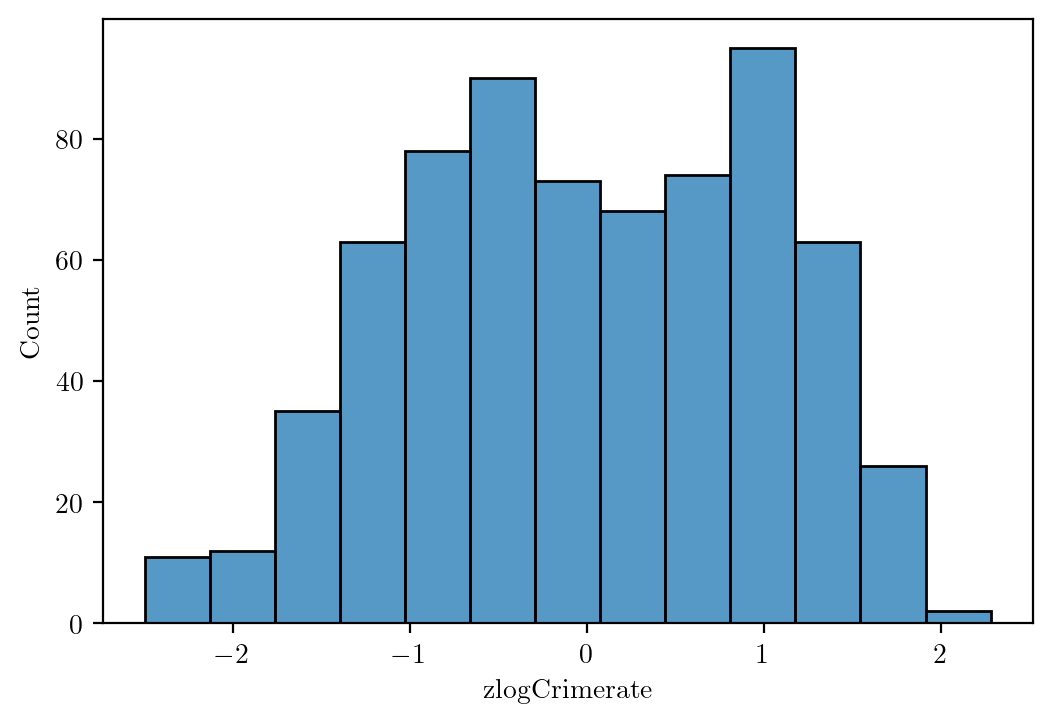

In [503]:
sns.histplot(data=crime_rate, x='zlogCrimerate', log_scale=False)
plt.savefig('../plots/crime-rate.png')

In [504]:
df.corr()

,postcode,price,bedrooms,bathrooms,parkingSpaces,studies,closest_primary_distance,closest_secondary_distance,closest_train_distance,closest_tram_distance,closest_bus_distance,closest_park_distance,min_pri_icsea,min_sec_icsea,Postcode,Crime Rate,zlogCrimerate
postcode,1.000000,0.051319,0.092818,0.057613,0.119880,-0.006227,-0.009974,0.013519,0.041681,0.070881,0.013961,0.030177,0.000964,-0.050472,1.000000,-0.321018,-0.292496
price,0.051319,1.000000,0.412856,0.479292,0.202823,0.133129,-0.036192,-0.054185,-0.094443,-0.195166,0.016785,-0.177642,0.277579,0.267611,0.051319,-0.049784,-0.109090
bedrooms,0.092818,0.412856,1.000000,0.559250,0.545468,0.060664,0.071231,0.177465,0.371649,0.392039,0.081440,0.236430,-0.225972,-0.250312,0.092818,-0.154044,-0.115181
bathrooms,0.057613,0.479292,0.559250,1.000000,0.338049,0.122663,0.102857,0.111635,0.253822,0.217483,0.082350,0.085251,-0.034211,-0.029606,0.057613,-0.060389,-0.054664
parkingSpaces,0.119880,0.202823,0.545468,0.338049,1.000000,0.066055,0.031953,0.132298,0.275907,0.316921,0.032941,0.218930,-0.216453,-0.278153,0.119880,-0.222070,-0.168876
studies,-0.006227,0.133129,0.060664,0.122663,0.066055,1.000000,0.019745,0.006221,0.032973,0.005817,0.010330,-0.000917,0.021652,0.039745,-0.006227,-0.007215,-0.007777
closest_primary_distance,-0.009974,-0.036192,0.071231,0.102857,0.031953,0.019745,1.000000,0.381517,0.393733,0.217055,0.323786,0.077098,-0.049193,0.036949,-0.009974,0.135316,0.094339
closest_secondary_distance,0.013519,-0.054185,0.177465,0.111635,0.132298,0.006221,0.381517,1.000000,0.494638,0.305288,0.247688,0.124328,-0.104458,-0.121652,0.013519,-0.007835,-0.042655
closest_train_distance,0.041681,-0.094443,0.371649,0.253822,0.275907,0.032973,0.393733,0.494638,1.000000,0.544138,0.324769,0.218460,-0.287455,-0.235733,0.041681,-0.044038,-0.029496
closest_tram_distance,0.070881,-0.195166,0.392039,0.217483,0.316921,0.005817,0.217055,0.305288,0.544138,1.000000,0.158681,0.258773,-0.561450,-0.532082,0.070881,0.087012,0.162054


<AxesSubplot:xlabel='closest_primary_distance', ylabel='Count'>

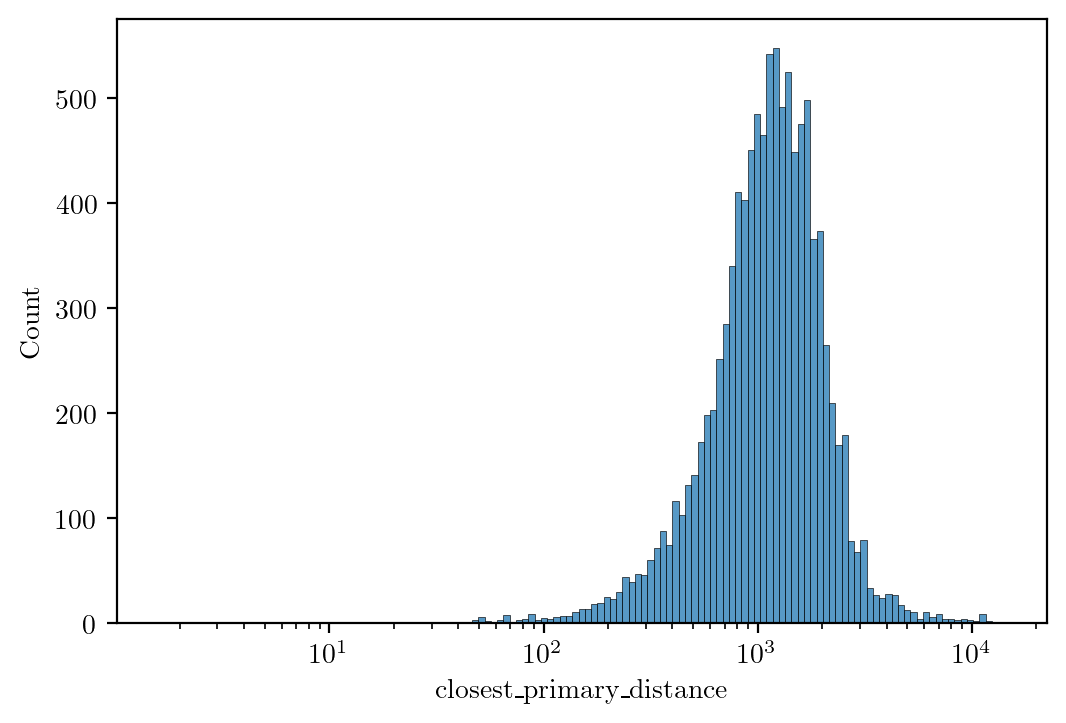

In [505]:
sns.histplot(df, x='closest_primary_distance', log_scale=True)

<AxesSubplot:xlabel='closest_park_distance', ylabel='Count'>

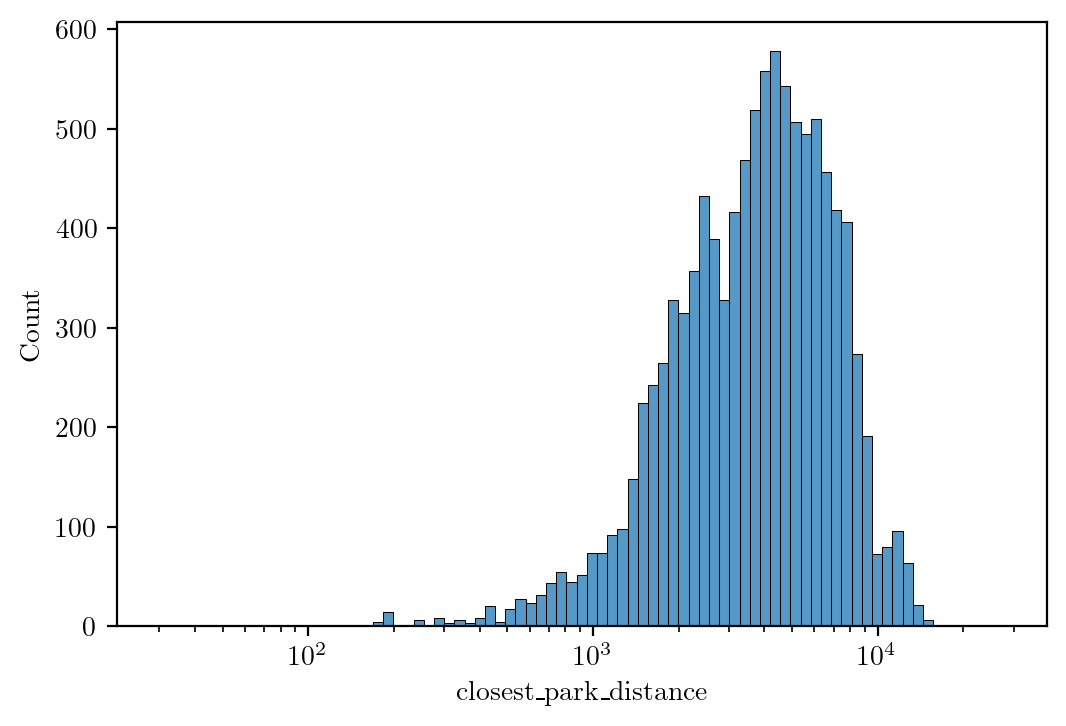

In [506]:
sns.histplot(df, x='closest_park_distance', log_scale=True)

<AxesSubplot:xlabel='closest_secondary_distance', ylabel='Count'>

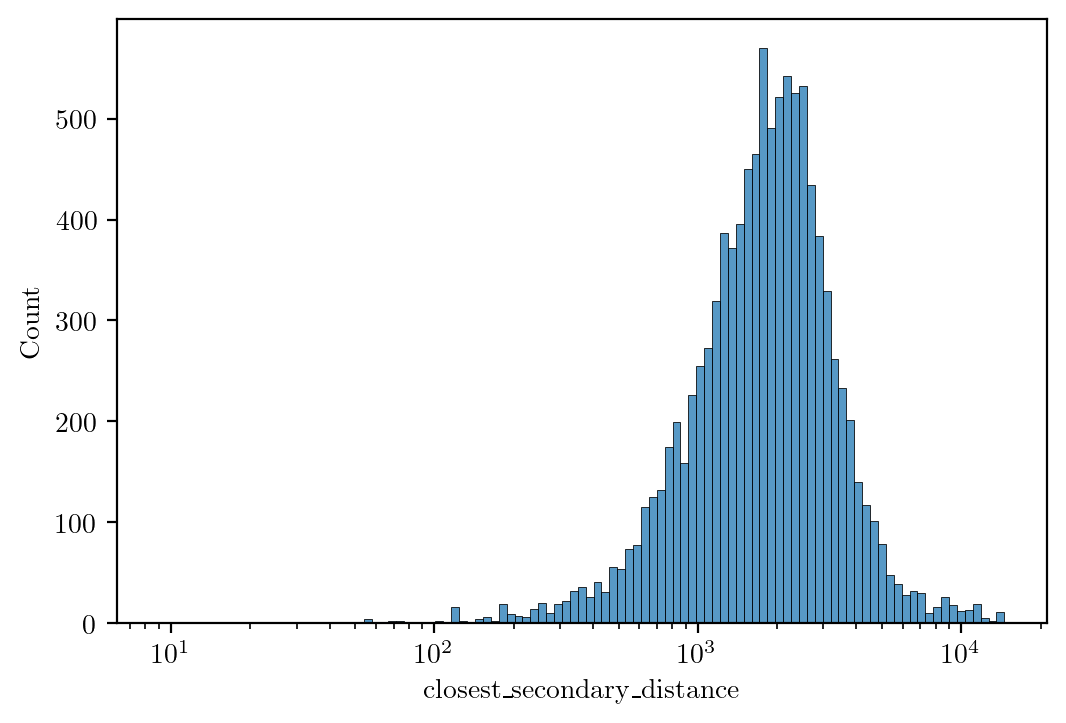

In [507]:
sns.histplot(df, x='closest_secondary_distance', log_scale=True)

<AxesSubplot:xlabel='closest_tram_distance', ylabel='Count'>

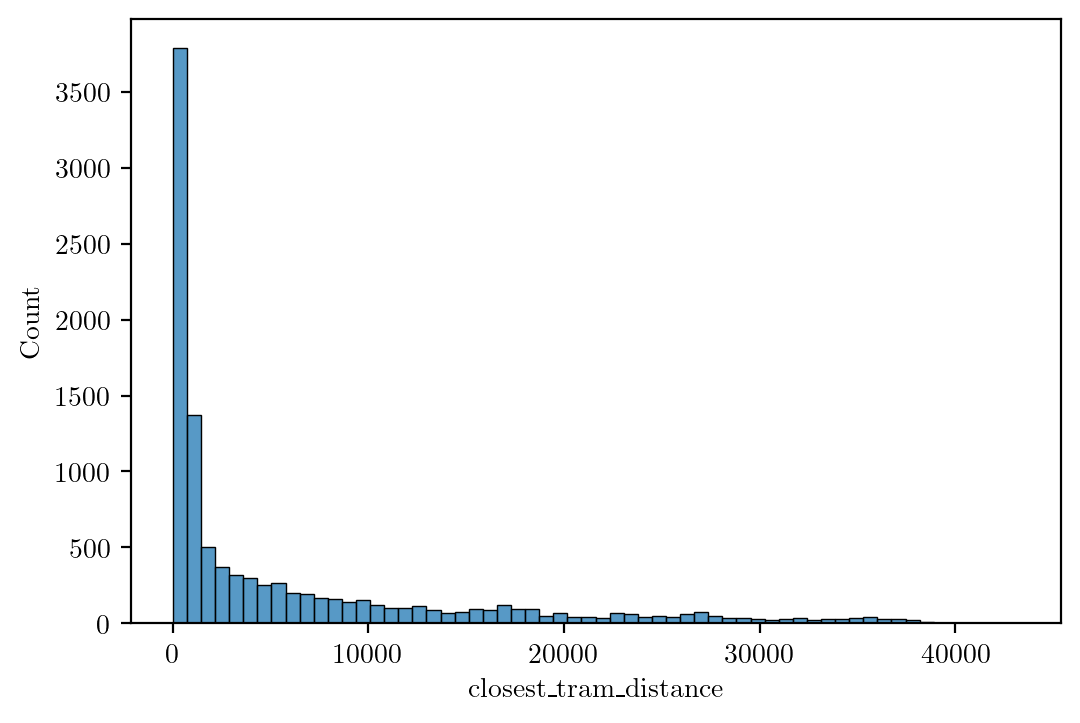

In [508]:
sns.histplot(df, x='closest_tram_distance', log_scale=False)

In [509]:
df.loc[:, 'bedrooms'] = df['bedrooms'].apply(lambda p: 1 if p in {0, 1} else p if p < 4 else '4+')
df.loc[:, 'parkingSpaces'] = df['parkingSpaces'].apply(lambda p: p if p < 3 else '3+')
df.loc[:, 'bathrooms'] = df['bathrooms'].apply(lambda p: p if p < 3 else '3+')


In [510]:
rcParams['figure.dpi'] = 200

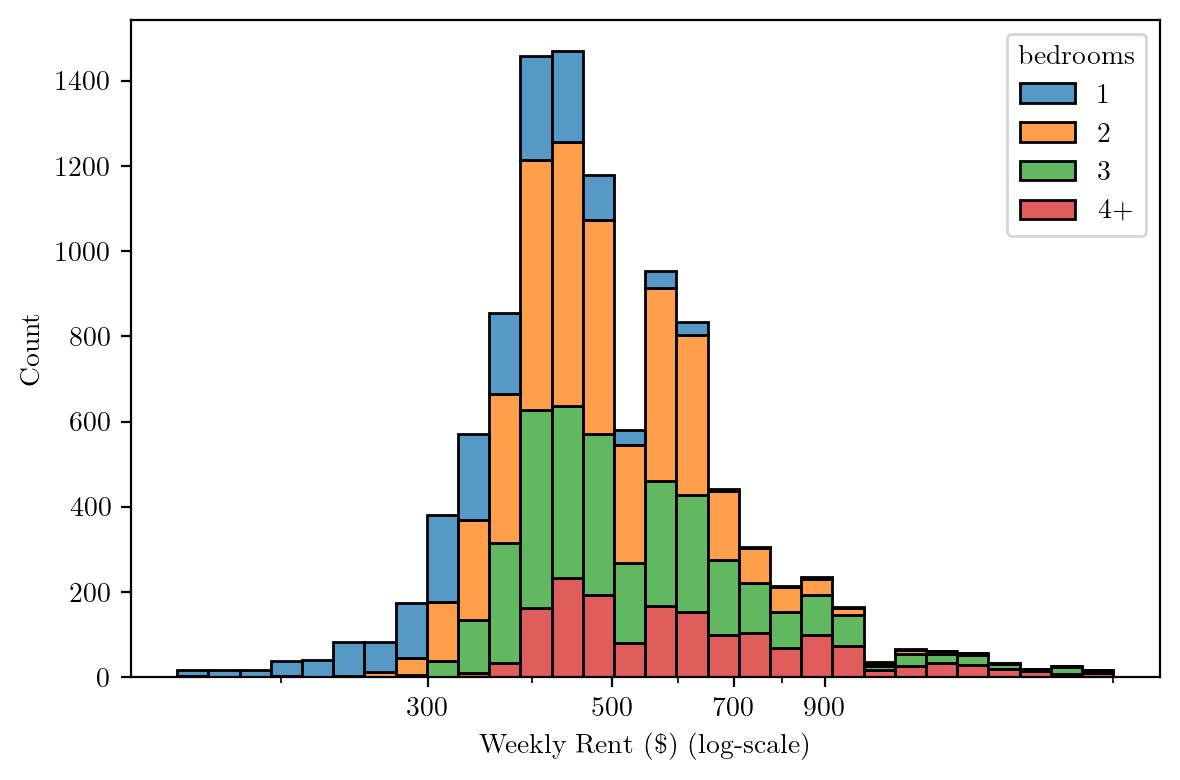

In [511]:
sns.histplot(df, x='price', hue='bedrooms', log_scale=True, multiple='stack', hue_order=[1, 2, 3, '4+'], bins=30)
plt.xlabel(r'Weekly Rent (\$) (log-scale)')
plt.xticks([300, 500, 700, 900], labels=['300', '500', '700', '900'])
plt.tight_layout()
plt.savefig('../plots/rent-distn-by-bedrooms.png')

* More bedrooms -> more rent

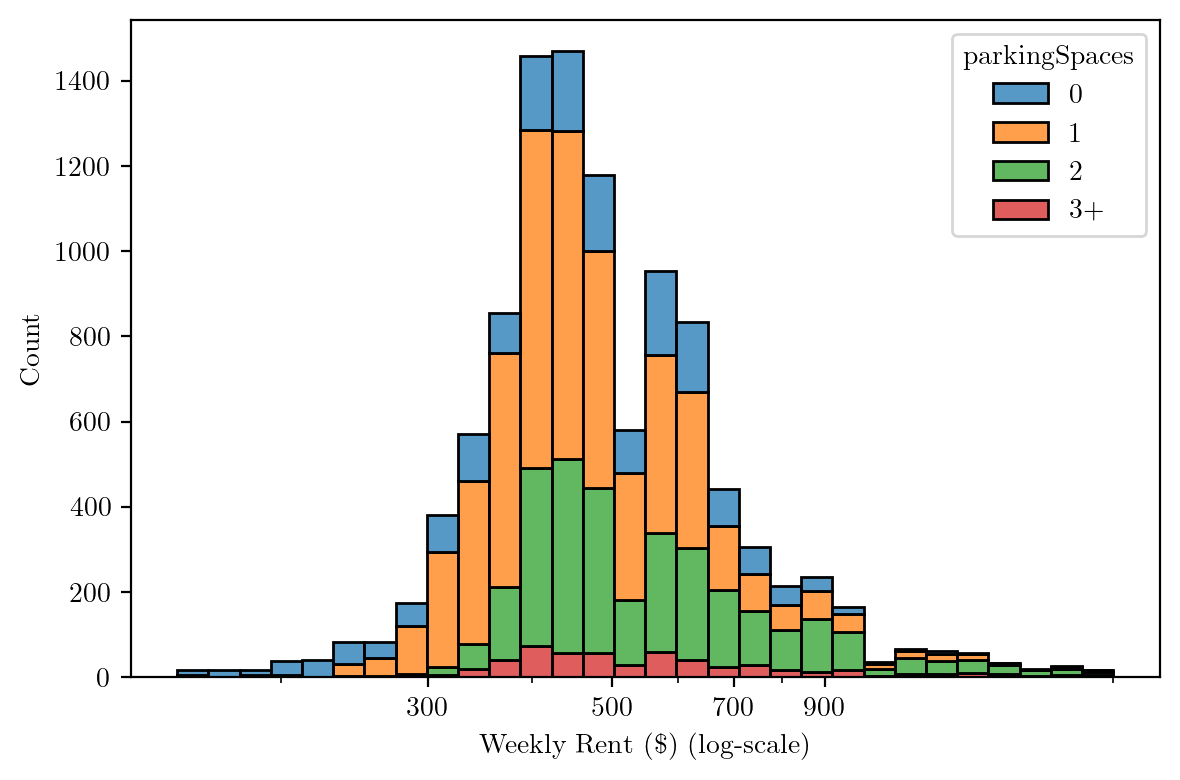

In [512]:
sns.histplot(df, x='price', hue='parkingSpaces', log_scale=True, multiple='stack', bins=30)
plt.xlabel(r'Weekly Rent (\$) (log-scale)')
plt.xticks([300, 500, 700, 900], labels=['300', '500', '700', '900'])
plt.tight_layout()
plt.savefig('../plots/rent-distn-by-parking.png')

* Properties less than $300 almost never have more than 1 parking space
* It is rare for a property to have more than 2 parking spaces, when it does, it doesn't seem to impact the rent

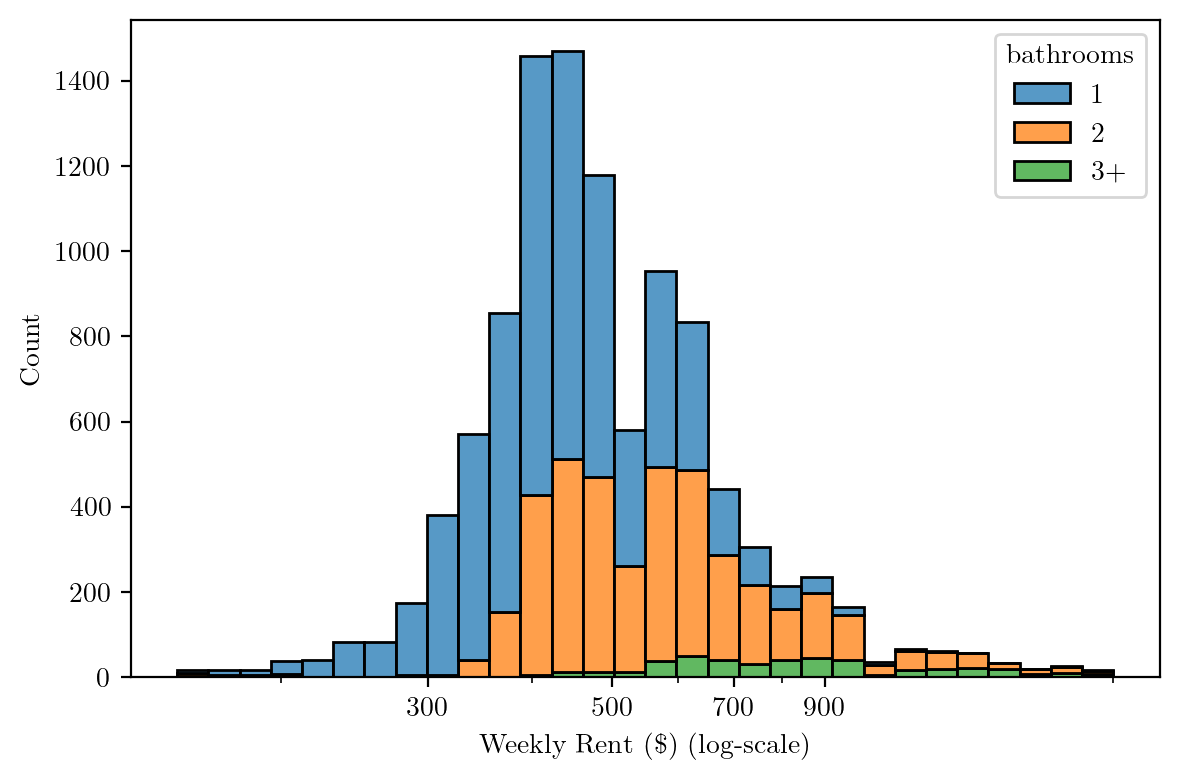

In [513]:
sns.histplot(df, x='price', hue='bathrooms', log_scale=True, multiple='stack', bins=30)
plt.xlabel(r'Weekly Rent (\$) (log-scale)')
plt.xticks([300, 500, 700, 900], labels=['300', '500', '700', '900'])
plt.tight_layout()
plt.savefig('../plots/rent-distn-by-bathrooms.png')

* Affordable properties almost never have more than 1 bathroom.
* Few properties have more than 2 bathrooms, those which do attract a premium.

In [514]:
df.loc[:, 'propertyType'] = df['propertyType'].apply(lambda t: t if t in ['House', 'Unit', 'Townhouse', 'Apartment'] else 'Other')

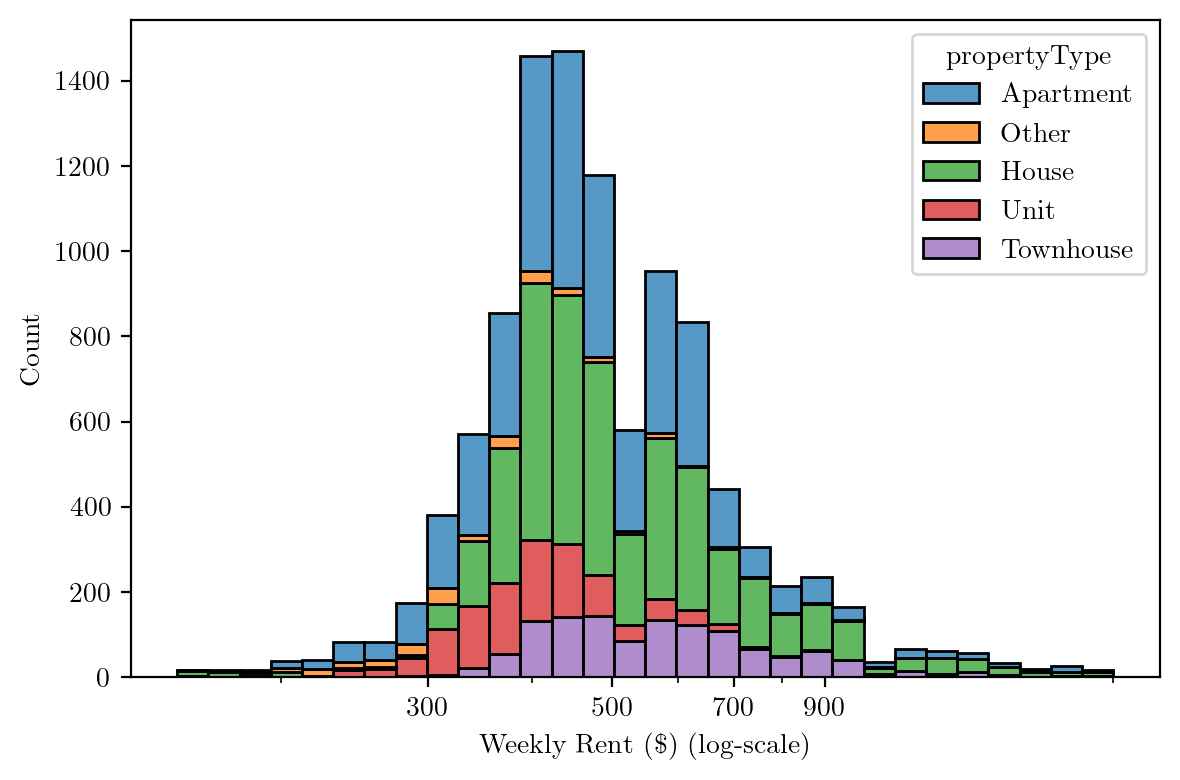

In [515]:
sns.histplot(data=df, x='price', hue='propertyType', multiple='stack',
             bins=30, log_scale=True)
plt.xlabel(r'Weekly Rent (\$) (log-scale)')
plt.xticks([300, 500, 700, 900], labels=['300', '500', '700', '900'])
plt.tight_layout()
plt.savefig('../plots/rent-distn-by-type.png')


* Townhouses attract a premium
* Units are more affordable

<AxesSubplot:xlabel='price', ylabel='Count'>

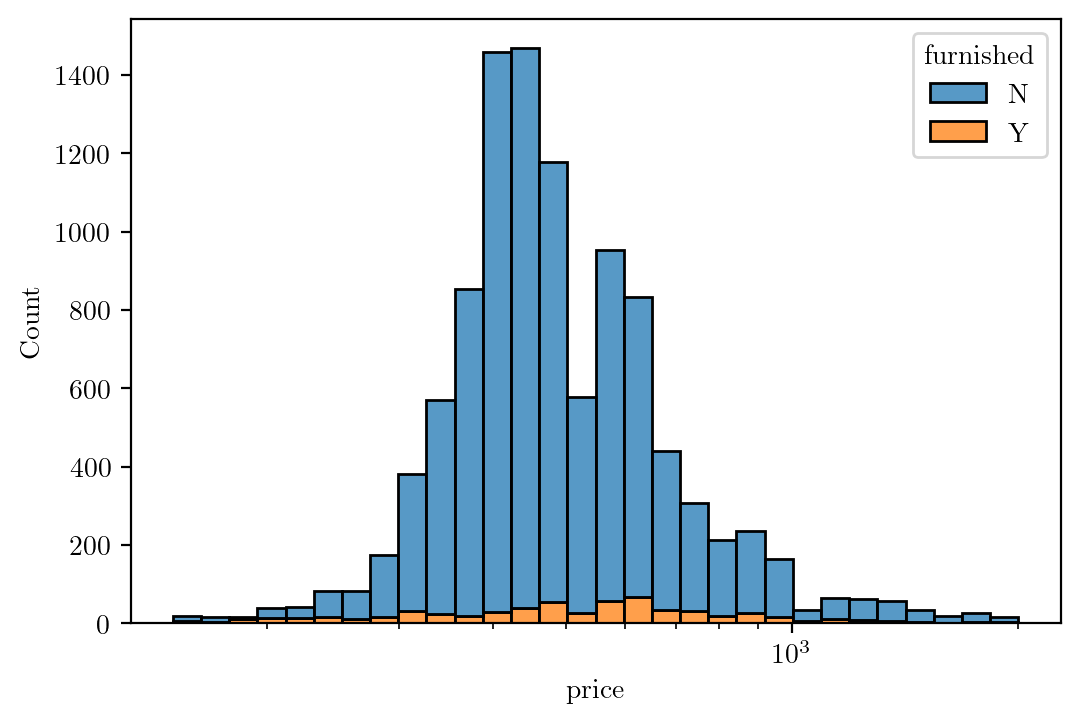

In [516]:
sns.histplot(data=df, x='price', hue='furnished', multiple='stack',
             bins=30, log_scale=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

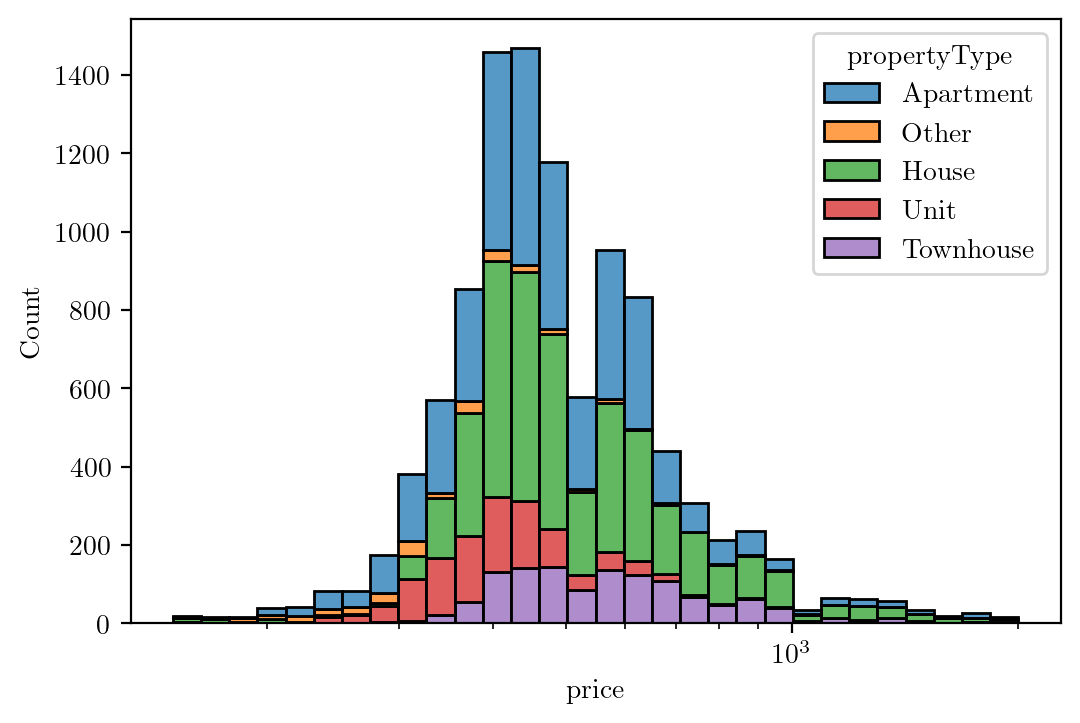

In [517]:
sns.histplot(data=df, x='price', hue='propertyType', multiple='stack',
             bins=30, log_scale=True)

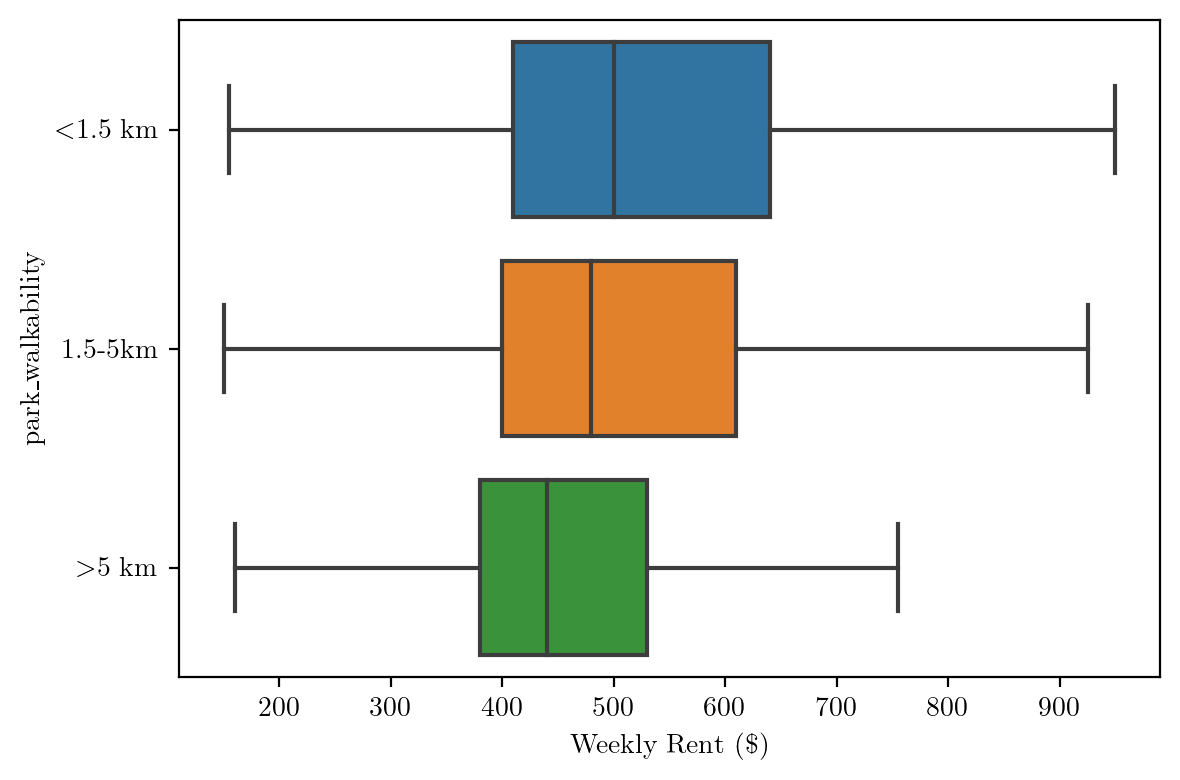

In [518]:
sns.boxplot(data=df, x='price', y='park_walkability', showfliers=False)
plt.xlabel(r'Weekly Rent (\$)')
plt.tight_layout()
plt.savefig('../plots/rent-by-park-walkability.png')

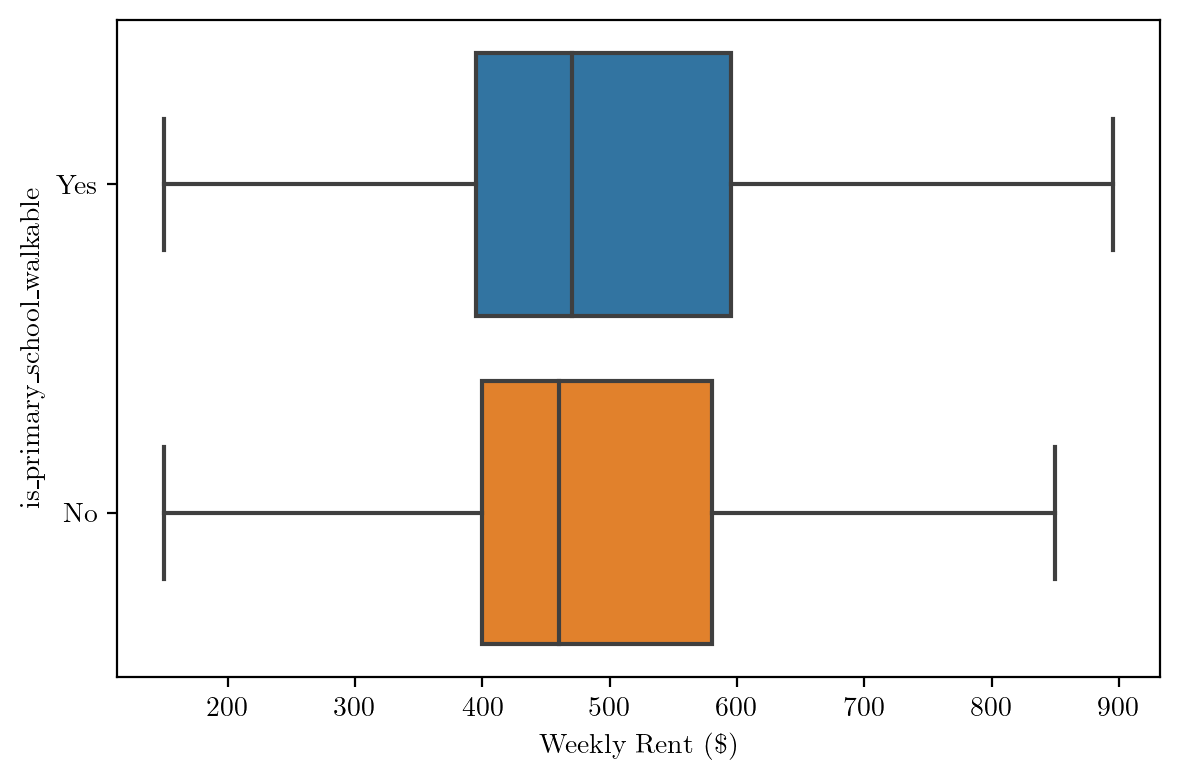

In [519]:
sns.boxplot(data=df, x='price', y='is_primary_school_walkable',
            showfliers=False)
plt.xlabel(r'Weekly Rent (\$)')
plt.tight_layout()
plt.savefig('../plots/rent-by-primary-school-walkability.png')

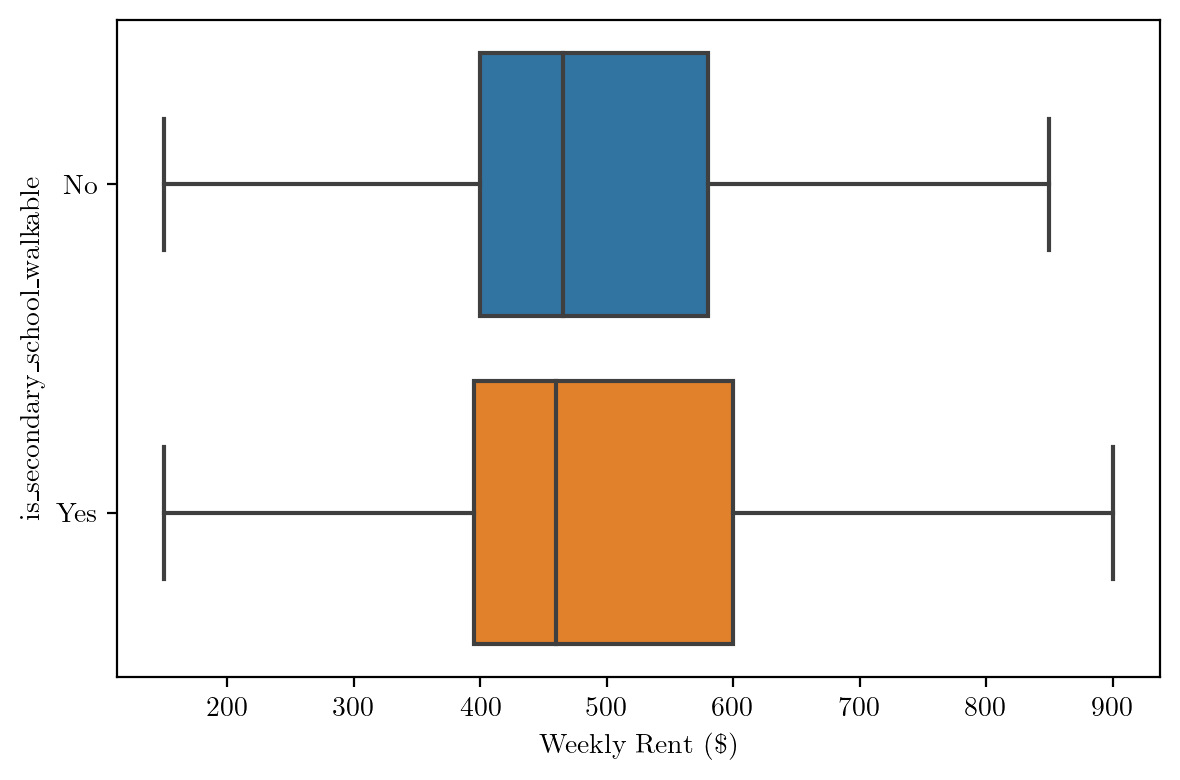

In [520]:
sns.boxplot(data=df, x='price', y='is_secondary_school_walkable',
            showfliers=False)
plt.xlabel(r'Weekly Rent (\$)')
plt.tight_layout()
plt.savefig('../plots/rent-by-secondary-school-walkability.png')

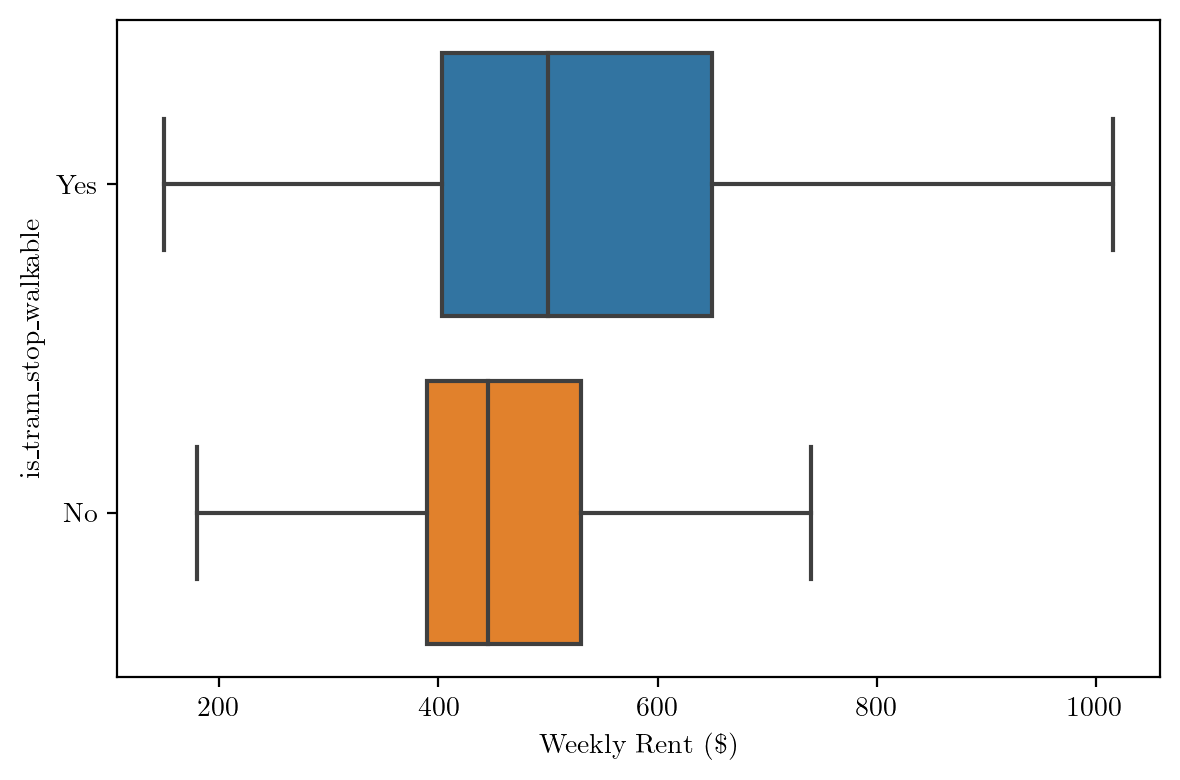

In [521]:
sns.boxplot(data=df, x='price', y='is_tram_stop_walkable', showfliers=False)
plt.xlabel(r'Weekly Rent (\$)')
plt.tight_layout()
plt.savefig('../plots/rent-by-tram-service.png')

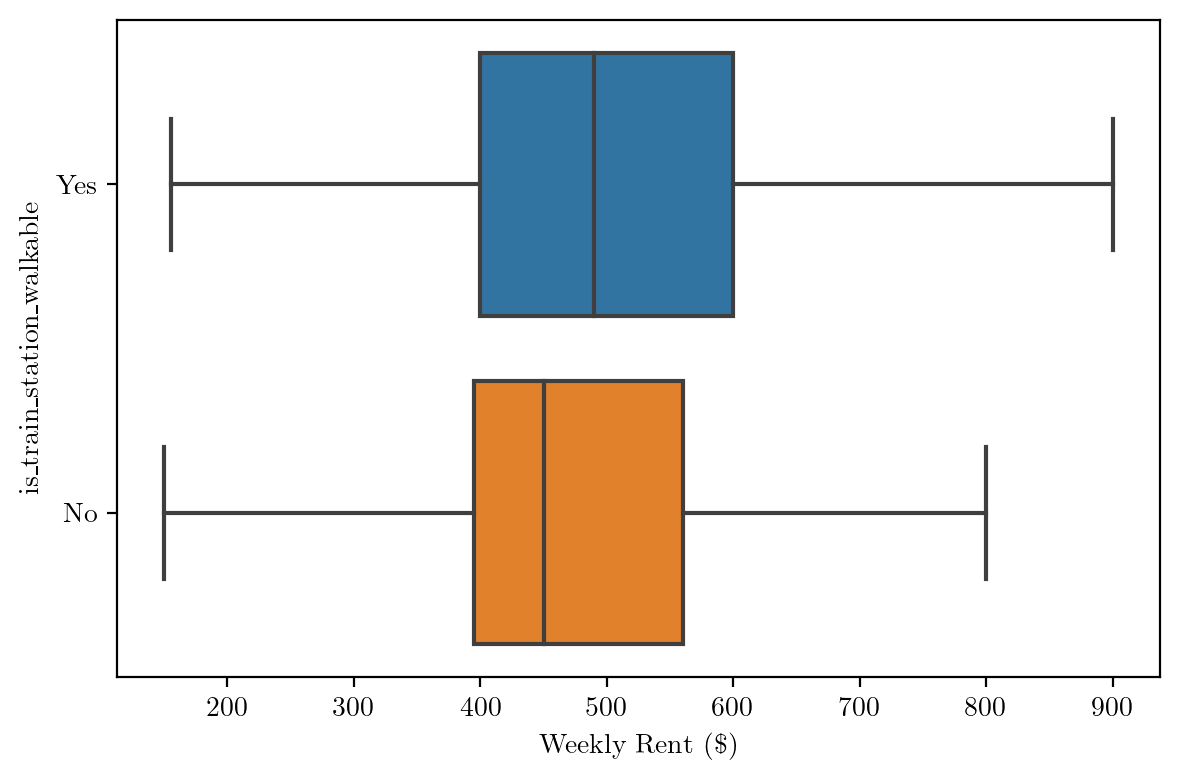

In [522]:
sns.boxplot(data=df, x='price', y='is_train_station_walkable', showfliers=False)
plt.xlabel(r'Weekly Rent (\$)')
plt.tight_layout()
plt.savefig('../plots/rent-by-train-service.png')

In [523]:
model = glm(formula="""price ~ closest_train_distance + closest_tram_distance
                             + closest_bus_distance + closest_park_distance""",
            families=families.Gaussian(link=families.links.log()),
            data=df)

model.fit().summary()

# Model interpretation:
#
# Effect of suburb properties on rental income
#
# Train station distance has no effect
# Properties close to tram stops are valued more
# Properties further from bus stops are valued more
# Properties close to parks are valued more
# Primary school ICSEA increases value alot

/home/lachstr/.local/lib/python3.10/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['families']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  price   No. Observations:                10422
Model:                            GLM   Df Residuals:                    10417
Model Family:                Gaussian   Df Model:                            4
Link Function:               identity   Scale:                          42132.
Method:                          IRLS   Log-Likelihood:                -70275.
Date:                Wed, 05 Oct 2022   Deviance:                   4.3889e+08
Time:                        23:27:13   Pearson chi2:                 4.39e+08
No. Iterations:                     3   Pseudo R-squ. (CS):            0.05993
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                584.8841      4.289    136.357      0.000     576.477     593.291
closest_train_distance     0.0014      0.001      1.311      0.190      -0.001       0.003
closest_tram_distance     -0.0042      0.000    -15.248      0.000      -0.005      -0.004
closest_bus_distance       0.0143      0.003      4.824      0.000       0.008       0.020
closest_park_distance     -0.0117      0.001    -14.033      0.000      -0.013      -0.010
==========================================================================================
"""

In [524]:

model = ols(formula="""price ~ closest_primary_distance + closest_secondary_distance""",
            data=df)

model.fit().summary()

# Model interpretation:
#
# Effect of suburb properties on rental income, a
#
# Primary school distance has no effect
# Properties closer to public secondary schools are valued more

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     16.82
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           5.10e-08
Time:                        23:27:13   Log-Likelihood:                -70571.
No. Observations:               10422   AIC:                         1.411e+05
Df Residuals:                   10419   BIC:                         1.412e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    539.6624      4.150    130.053      0.000     531.529     547.796
closest_primary_distance      -0.0042      0.002     -1.716      0.086      -0.009       0.001
closest_secondary_distance    -0.0069      0.002     -4.466      0.000      -0.010      -0.004
==============================================================================
Omnibus:                     5526.119   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47258.247
Skew:                           2.418   Prob(JB):                         0.00
Kurtosis:                      12.244   Cond. No.                     5.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [525]:
df2 = df.dropna(subset='zlogCrimerate')

In [526]:
df


,suburb,postcode,price,propertyType,bedrooms,bathrooms,parkingSpaces,studies,furnished,closest_primary_distance,...,min_pri_icsea,min_sec_icsea,park_walkability,is_primary_school_walkable,is_secondary_school_walkable,is_tram_stop_walkable,is_train_station_walkable,Postcode,Crime Rate,zlogCrimerate
0,Melbourne,3000,560,Apartment,2,1,0,0,N,821.8,...,1140.0,1127.0,$<$1.5 km,Yes,No,Yes,Yes,3000,16212,2.282536
1,Melbourne,3000,580,Apartment,2,1,0,0,Y,1690.6,...,1114.0,1138.0,1.5-5km,No,No,Yes,Yes,3000,16212,2.282536
2,Melbourne,3000,450,Apartment,1,1,0,0,N,786.9,...,1140.0,1127.0,$<$1.5 km,Yes,No,Yes,Yes,3000,16212,2.282536
3,Melbourne,3000,550,Apartment,2,2,1,0,N,2026.9,...,1114.0,1138.0,1.5-5km,No,No,Yes,No,3000,16212,2.282536
4,Melbourne,3000,600,Apartment,2,1,0,0,Y,1690.6,...,1114.0,1138.0,1.5-5km,No,No,Yes,Yes,3000,16212,2.282536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10417,Mount Dandenong,3767,750,House,3,2,3+,0,N,2244.4,...,1011.0,NaN,1.5-5km,No,No,No,No,3767,108,-0.187339
10418,Cockatoo,3781,300,House,1,1,1,0,N,1761.4,...,1009.0,NaN,1.5-5km,No,No,No,No,3781,196,0.106394
10419,Emerald,3782,680,House,3,2,2,1,N,3251.3,...,982.0,973.0,1.5-5km,No,No,No,No,3782,260,0.245658
10420,Emerald,3782,490,House,3,1,1,0,N,2350.8,...,1048.0,973.0,1.5-5km,No,No,No,No,3782,260,0.245658


<AxesSubplot:xlabel='zlogCrimerate', ylabel='logPrice'>

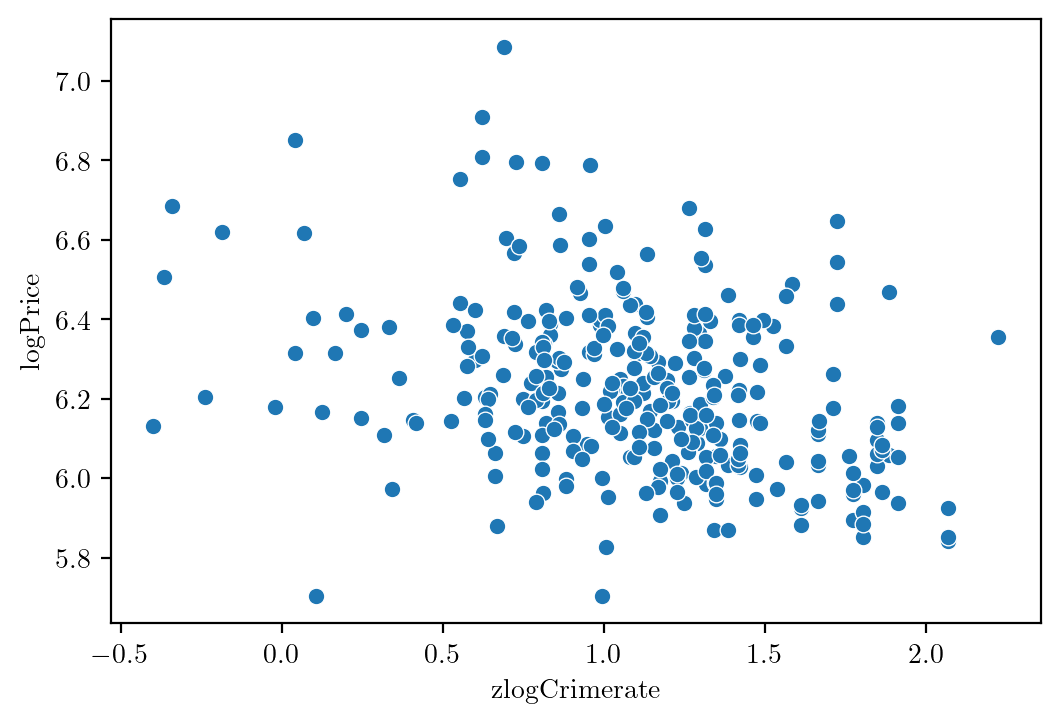

In [529]:
df2 = df2.groupby(by=['suburb']).mean()
df2['logPrice'] = log(df2['price'])

sns.scatterplot(data=df2, x='zlogCrimerate', y='logPrice')

In [528]:
model = glm(formula="""price ~ zlogCrimerate""",
            families=families.Gaussian(link=families.links.log()),
            data=df)

model.fit().summary()

/home/lachstr/.local/lib/python3.10/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['families']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  price   No. Observations:                10422
Model:                            GLM   Df Residuals:                    10420
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          44192.
Method:                          IRLS   Log-Likelihood:                -70526.
Date:                Wed, 05 Oct 2022   Deviance:                   4.6048e+08
Time:                        23:27:13   Pearson chi2:                 4.60e+08
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01197
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       588.2846      6.468     90.947      0.000     575.607     600.962
zlogCrimerate   -51.6002      4.606    -11.203      0.000     -60.628     -42.572
=================================================================================
"""